In [ ]:
!pip install -q scikit-learn matplotlib pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from scipy.sparse.csgraph import shortest_path
from sklearn.manifold import MDS

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving distances (1).csv to distances (1).csv


In [ ]:
df = pd.read_csv("distances (1).csv")
city_names = df.columns[1:]
dist_matrix = df.iloc[:, 1:].values
n_cities = len(city_names)

#ISOmap-Implementation

In [ ]:
from sklearn.neighbors import NearestNeighbors
from scipy.sparse.csgraph import shortest_path
from sklearn.manifold import MDS
import numpy as np

def run_isomap_knn(dist_matrix, k=5, n_components=2):
    nbrs = NearestNeighbors(n_neighbors=k+1, metric='precomputed').fit(dist_matrix)
    knn_graph = nbrs.kneighbors_graph(dist_matrix, mode='distance')
    graph_matrix = knn_graph.toarray()
    graph_matrix[graph_matrix == 0] = np.inf
    np.fill_diagonal(graph_matrix, 0)

    geodesic_dist = shortest_path(graph_matrix, method='D', directed=False)

    mds = MDS(n_components=n_components, dissimilarity='precomputed', random_state=42)
    embedding = mds.fit_transform(geodesic_dist)

    return embedding


In [ ]:
import matplotlib.pyplot as plt

def plot_embedding(embedding, title, names):
    plt.figure(figsize=(10, 8))
    x, y = embedding[:, 0], embedding[:, 1]
    plt.scatter(x, y, c='orange', s=100)

    for i, name in enumerate(names):
        plt.text(x[i] + 5, y[i] + 5, name, fontsize=9)

    plt.title(title)
    plt.axis('equal')
    plt.grid(True)
    plt.show()


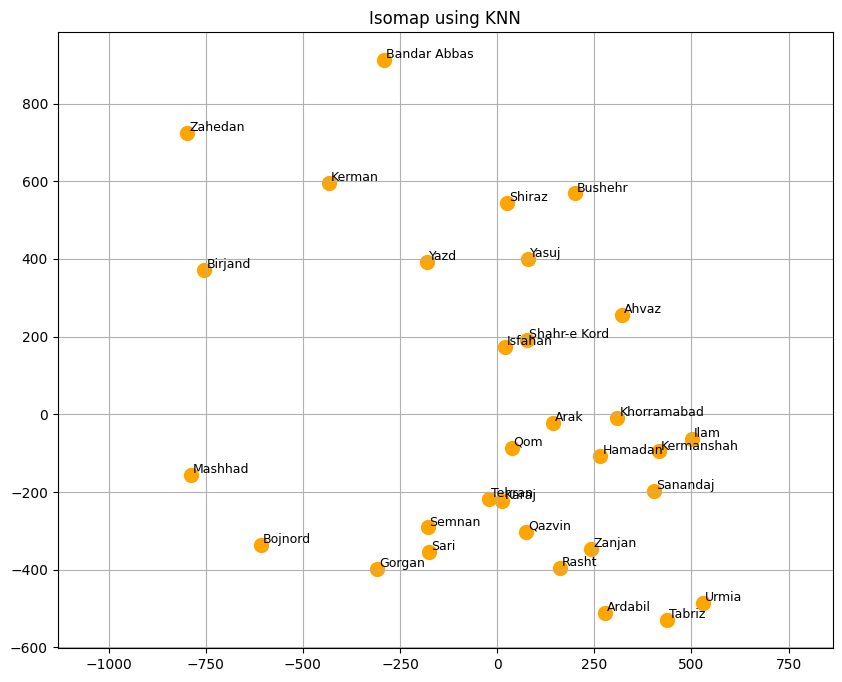

In [ ]:
embedding_knn = run_isomap_knn(dist_matrix, k=5)
plot_embedding(embedding_knn, "Isomap using KNN", city_names)

#Applying rotation and reflection

In [ ]:
def rotate_points(points, angle_deg):
    angle_rad = np.deg2rad(angle_deg)
    rotation_matrix = np.array([
        [np.cos(angle_rad), -np.sin(angle_rad)],
        [np.sin(angle_rad),  np.cos(angle_rad)]
    ])
    return points @ rotation_matrix.T

def reflect_points(points, axis='x'):
    if axis == 'x':
        return points * np.array([1, -1])
    elif axis == 'y':
        return points * np.array([-1, 1])
    else:
        return points

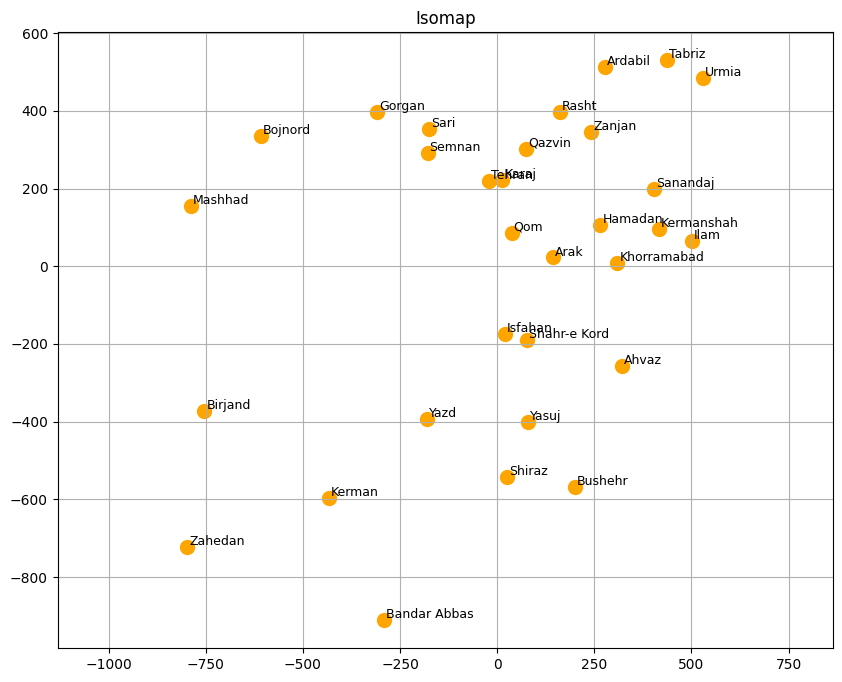

In [ ]:

adjusted_knn = rotate_points(embedding_knn,180)
adjusted_knn = reflect_points(adjusted_knn, axis='y')
plot_embedding(adjusted_knn, "Isomap", city_names)

#Final result

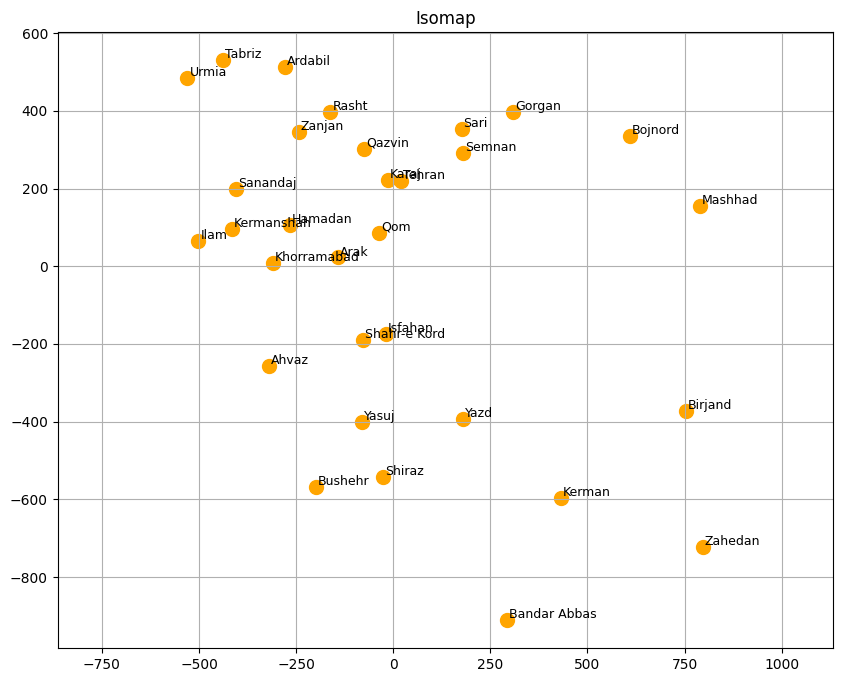

In [ ]:
adjusted_knn = reflect_points(adjusted_knn, axis='y')
plot_embedding(adjusted_knn, "Isomap", city_names)